<a href="https://colab.research.google.com/github/PedroHPCintra/COVID_Brasil/blob/main/RTA_carga_viral/RTA_carga_viral_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimativa carga viral através de teste rápido de antígeno

Olá :D!

Nesse notebook iremos aprender como usar fotos do teste rápido de antígeno (TRA ou RAT, em inglês) para estimar a dinâmica da carga viral em um paciente com COVID-19. Antes de começar o código, iremos dar uma olhada no funcionamento geral do TRA e ressaltar alguns pontos importantes para se obter melhores resultados, porfavor leia tudo para se atentar aos pontos importantes. Se quiser, confira o meu fio no [Twitter](https://twitter.com/pedrocintra52/status/1528398691693895681) sobre esse método.

## Funcionamento TRA

O RTA é um teste de fluxo lateral, ou seja, a solução com a amostra flui lateralmente através de capilaridade, passando por algumas regiões nas quais reações acontecem e revelam para nós a presença ou ausência de antígenos (para mais informações, confira na Wikipedia [Rapid antigen test](https://en.wikipedia.org/wiki/Rapid_antigen_test) e [Lateral flow test](https://en.wikipedia.org/wiki/Lateral_flow_test)). De forma geral, a amostra de mucosa/saliva com vírus é colocada em uma solução que perturba as partículas virais e expõe a proteína N, esse é o antígeno em questão.

Essa solução com o antígeno passa por capilaridade por uma região cheia de anticorpos específicos contra a proteína N que se ligam nos antígenos e fluem até a linha de teste T. Lá os anticorpos ligados param e formam a marcação. Os anticorpos que não se ligaram e o restante da solução continuam fluindo até a linha de controle C, gerando a outra marca. Como a quantidade de anticorpos que vão parar na linha T depende da quantidade de antígeno, é de se esperar que a intensidade dessa marcação esteja correlacionada com a quantidade de vírus na amostra.

De fato, a quantidade de antígenos está bem correlacionada com carga viral medida em cópias de RNA. Além disso, a positividade dos TRAs também está bem relacionada com a carga viral nos indivíduos (verifique as referências [[1](https://doi.org/10.1016/j.jiac.2020.11.021)] e [[2](https://doi.org/10.1038/s41591-022-01780-9)] para detalhes técnicos). Isso significa que podemos sim dizer que a intensidade da marcação teste $I_{\mathrm{T}}$ no teste rápido é proporcional à carga viral $\mathrm{V}$ de quem fez o teste.

\begin{align}
    I_{\mathrm{T}} \propto \mathrm{V}
\end{align}

Agora é **importante** dizer aqui que não dá para saber qual é o valor da sua carga viral por um teste de antígeno caseiro. O que é útil é saber que se a intensidade da faixa aumenta, relativa ao controle, você provavelmente está com mais vírus e em um período mais infeccioso ou o contrário também, caso a intensidade diminua.

Aqui há duas possibilidades para o que ocorre com a faixa controle. Caso a quantidade de anticorpos $N_{\mathrm{ab}}$ seja muito maior que a de antígenos $N_{\mathrm{ag}}$, podemos imaginar que a faixa T vai ficar mais intensa conforme a quantidade de antígenos aumenta, mas a faixa C não fica menos intensa porque mesmo havendo mais antígenos na amostra, ainda tem muitos anticorpos sobrando para ir parar na faixa C. Sendo assim, a intensidade C não muda conforme T muda. A outra possibilidade é que o numero de anticorpos no teste não seja tão maior que a quantidade de antígenos. Nesse caso, um aumento na faixa T provoca uma diminuição na C, já que a quantidade de anticorpos que se ligam na solução representam uma fração maior do total. A função $f\left( N_{\mathrm{ab}} - N_{\mathrm{ag}} \right)$ que descreve essa diminuição é complexa e depende das características de cada teste

\begin{align}
    I_{\mathrm{C}} = 
    \begin{cases}
        \mathrm{constante}, & \text{se } N_{\mathrm{ab}} >> N_{\mathrm{ag}} \\
        f\left( N_{\mathrm{ab}} - N_{\mathrm{ag}} \right), & \text{caso contrário}
    \end{cases}
\end{align}

Mas de qualquer uma das formas, a razão T/C vai nos dar uma estimativa da carga viral de quem está doente.

### **IMPORTANTE**

É importante que os testes sejam sempre feitos pela mesma marca, para não correr risco de que essas duas situações mudem entre um teste e outro.

Por exemplo, imaginem que no primeiro teste, a quantidade de antígeno seja 200 e a quantidade de anticorpos seja 10000. Assim, sobram 9800 anticorpos (só 2% foi ligado em antígenos) que se acumulam na faixa C e ela fica bem intensa. Já no segundo teste, a quantidade de antígeno seja 100 (diminui pela metade), mas a quantidade de anticorpos no teste deles seja 1000. Nesse caso, 100 representa 10% de 1000, enquanto se fosse feito com a mesma marca do primeiro, isso representaria 1% do total disponível. Logo, a razão entre as intensidades da linha T e C pode mudar e enviesar o resultado.

### Referências

1. Aoki, K., Nagasawa, T., Ishii, Y., Yagi, S., Okuma, S., Kashiwagi, K., ... & Tateda, K. (2021). Clinical validation of quantitative SARS-CoV-2 antigen assays to estimate SARS-CoV-2 viral loads in nasopharyngeal swabs. Journal of Infection and Chemotherapy, 27(4), 613-616. [https://doi.org/10.1016/j.jiac.2020.11.021](https://doi.org/10.1016/j.jiac.2020.11.021)

2. Killingley, B., Mann, A. J., Kalinova, M., Boyers, A., Goonawardane, N., Zhou, J., ... & Chiu, C. (2022). Safety, tolerability and viral kinetics during SARS-CoV-2 human challenge in young adults. Nature Medicine, 1-11. [https://doi.org/10.1038/s41591-022-01780-9](https://doi.org/10.1038/s41591-022-01780-9)

## Extração de informação

A ideia para ter as intensidades das linhas T e C é usar uma foto do teste. **É IMPORTANTE** que a foto seja tirada em um ambiente com luminosidade natural, sempre com o mesmo aparelho e na mesma hora do dia.

E o que fazer com essa foto? (Exemplo de foto logo abaixo)

![Teste_Vava_dia_6.png](https://drive.google.com/uc?export=view&id=1tBSRBpHDRX7xXGngAShE4Ea8dYe4S73s)

Estamos interessados na intensidade das faixas. Pelo material usado nos testes, a faixa de cor mais refletida por elas são o vermelho (canal R) e depois o azul (canal B). Portanto, se olharmos para o canal verde (G) da foto fica mais fácil de ver o contraste entre elas, por essa cor ser mais absorvida que as outras. Na imagem abaixo tem a intensidade luminosa média de cada um dos canais RGB da imagem de um teste de antígeno na região marcada pelo retângulo preto, note que o vermelho possui um contraste fraco com a cor branca no fundo, o azul apesar de possuir um bom contraste, ainda é um pouco menor que o verde.

![Intensidade_luminosa_antigenos_covid_canais_RGB.png](https://drive.google.com/uc?export=view&id=1VoPg6NpDY0pUQvkmUOgzh8EgXLD1Ox5k)

Por esse motivo, devemos decompor a imagem do teste nos 3 canais RGB e utilizar apenas o canal verde.

![Canais_RGB_antigenos_covid.png](https://drive.google.com/uc?export=view&id=1eSm9PICJcKAzoa7zKRpG4L0GkajQZzcI)

É interessante também colocar a foto em negativo, após selecionar apenas o canal G, para que a absorção nas linhas, relativo à intensidade luminosa do fundo, seja um valor positivo.

![Inversao_canal_G_antigenos_covid.png](https://drive.google.com/uc?export=view&id=14SNbsPziVmSC0bgqNBTLZaP0WTOlbNA6)

Agora, a região que estamos interessados na imagem é essa com as duas faixas (imagem abaixo). Nela, há 3 coisas que precisamos. Precisamos do valor de intensidade dos pixels nas duas faixas. E o valor de intensidade dos pixels na região branca entre as duas.

![Zoom_antigenos_covid_2.png](https://drive.google.com/uc?export=view&id=1EL5TR0qem0-sKbykFJ4Gyc-xrVJog1Pa)

![Intensidade_luminosa_antigenos_covid_3d.png](https://drive.google.com/uc?export=view&id=1iT-QC_smoyYzkliXx3nbg4NyOdbhS8jy)

A região branca entre elas é o que vai nos dar o sinal de fundo, ou seja, a intensidade luminosa fora das faixas. Isso depende da luminosidade do ambiente, e precisamos pegar esse valor justamente para evitar que o resultado da razão T/C seja tão dependente da luminosidade local

![Intensidade_luminosa_antigenos_covid.png](https://drive.google.com/uc?export=view&id=1oTuFYvLCG5MhOfIYvfPArV-wadlJjZrM)

No final das contas, pegamos a intensidade de cada faixa e subtraímos o sinal de fundo, e ai fazemos a razão entre elas.

\begin{align}
    R_{\mathrm{T}/\mathrm{C}} = \frac{h_{\mathrm{t}} - h_{\mathrm{bg}}}{h_{\mathrm{c}} - h_{\mathrm{bg}}}
\end{align}

Essa é nossa métrica. Sozinha, ela não diz muita coisa, já que não podemos usar isso para saber diretamente a carga viral. Mas com o passar dos dias, ela nos da informação a respeito da dinâmica da infecção.

![Vava_antigenos_covid.png](https://drive.google.com/uc?export=view&id=1vTkae5zaGC8_b26dGmyoMEZDRaUmVUwN)

Com isso podemos saber como a carga viral está se comportando no corpo e podemos ter uma ideia do estágio da doença no indivíduo (veja a referência [[3](https://doi.org/10.1093/cid/ciaa345)]), se ele ainda está na fase aguda, com a replicação do vírus acelerando e consequentemente uma infectividade maior, ou se ele já se encontra no período convalescente, onde a carga viral vai reduzindo até o paciente se curar.

**Lembrando também que pelo mecanismo de funcionamento do teste, a chance de ter falso positivo é menor do que a de falso negativo (Referências [[4](https://doi.org/10.1016/j.jiph.2021.06.002)] e [[5](https://doi.org/10.3390/jcm10163493)]). Por isso, se o teste der + mesmo após 5 dias de isolamento, se considere infectado e se puder faça um PCR**

### Referências

3. Yu, F., Yan, L., Wang, N., Yang, S., Wang, L., Tang, Y., ... & Zhang, F. (2020). Quantitative detection and viral load analysis of SARS-CoV-2 in infected patients. Clinical Infectious Diseases, 71(15), 793-798. [https://doi.org/10.1093/cid/ciaa345](https://doi.org/10.1093/cid/ciaa345)

4. Amer, R. M., Samir, M., Gaber, O. A., El-Deeb, N. A., Abdelmoaty, A. A., Ahmed, A. A., ... & Anis, R. H. (2021). Diagnostic performance of rapid antigen test for COVID-19 and the effect of viral load, sampling time, subject’s clinical and laboratory parameters on test accuracy. Journal of Infection and Public Health, 14(10), 1446-1453. [https://doi.org/10.1016/j.jiph.2021.06.002](https://doi.org/10.1016/j.jiph.2021.06.002)

5. Khandker, S. S., Nik Hashim, N. H. H., Deris, Z. Z., Shueb, R. H., & Islam, M. A. (2021). Diagnostic accuracy of rapid antigen test kits for detecting SARS-CoV-2: a systematic review and meta-analysis of 17,171 suspected COVID-19 patients. Journal of clinical medicine, 10(16), 3493. [https://doi.org/10.3390/jcm10163493](https://doi.org/10.3390/jcm10163493)

## Código

Para fazer esta análise, iremos utilizar 3 bibliotecas do Python, o ```numpy``` para as operações e conceitos matemáticos, o ```matplotlib``` para montagem de gráficos e visualização da imagem e o ```PIL``` para importar a foto do teste no nosso código e a biblioteca ```google.colab``` para poder fazer upload da imagem do teste para o google colab.

In [1]:
# Ignorando avisos não necessários
import warnings
warnings.filterwarnings('ignore')
# Importanto as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from google.colab import files

Só rode está próxima célula de código caso tenha o $\LaTeX$ instalado no seu computador, ela apenas serve para deixar os gráficos com a fonte padrão do $\LaTeX$. Caso não saiba se possui $\LaTeX$ no seu computador ou não deseja usar a fonte padrão, mantenha esta célula de código comentada, ou seja, não tire os #

In [ ]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

Começaremos fazendo upload da imagem do teste para o google colab usando a função ```upload``` da biblioteca ```files``` importada do ```google.colab```.

In [ ]:
uploaded = files.upload()

Agora podemos trazer para o código a imagem do teste. Faremos isso na próxima célula. As imagens precisam estar em formato **jpg** ou **png**! **É importante** que a imagem esteja na vertical (como a imagem que mostrei na sessão "Extração de informação"). Caso a foto esteja "torta", use o argumento ```.rotate(ângulo)``` junto com a função ```open```. Por exemplo

```python
img = Image.open('foto.png').rotate(angulo)
```

No local onde está escrito "nome.png" coloque o nome do arquivo. Por exemplo, se eu salvei a imagem com o nome "Teste_antigeno_dia3.png" o código fica

```python
img = Image.open('/content/Teste_antigeno_dia3.png')
```

Lembrando de rotacionar a imagem caso a orientação não esteja correta. Logo após importar a imagem, o comando

```python
img = 255 - np.array(img)
```

faz com que a imagem fique em negativo, como mencionei na sessão "Extração de informação".

In [ ]:
img = Image.open('/content/nome.png')#.rotate(coloque o angulo de rotação aqui, caso necessário)
img = 255 - np.array(img)

Vamos ver a imagem que importamos

(0.0, 3024.0)

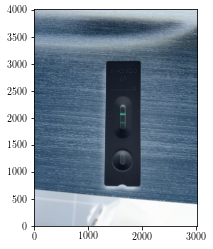

In [ ]:
plt.imshow(img)
plt.ylim(0,img.shape[0])
plt.xlim(0,img.shape[1])

Vamos agora selecionar apenas o canal verde da imagem, a imagem é importada no Python com as dimensões $(h,w,c)$ onde $h$ é a altura (numero de pixels na altura), $w$ é a largura e $c$ é o canal de cor. O canal $c = 0$ é o vermelho, $c = 1$ é verde e $c = 2$ é azul. Estamos interessados no canal $c = 1$.

(0.0, 3024.0)

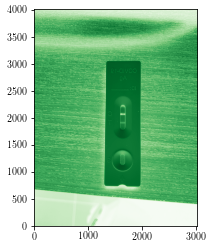

In [ ]:
img_g = img[:,:,1]
# Visualizando a imagem
plt.imshow(img_g, cmap = 'Greens_r')
plt.ylim(0,img_g.shape[0])
plt.xlim(0,img_g.shape[1])

Aqui vem uma parte mais chata e manual, precisamos saber em qual o intervalo de pixels a região das faixas está. Precisamos para isso definir as coordenadas, em pixels, ```x_init``` e ```x_final``` que vão dizer para o código aonde o intervalo de pixels da região das faixas começa, na direção $x$ (horizontal) e o mesmo na direção $y$ (vertical) com as coordenadas ```y_init``` e ```y_final```. Essa parte é um pouco tentativa e erro, olhe para os eixos da sua imagem acima e va testando valores de início e fim para o intervalo de pixels até ver que a imagem é composta apenas pela região das duas faixas.

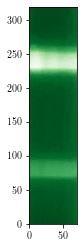

In [ ]:
# Esses valores são os que usei na imagem de exemplo que está nesse notebook, mude eles para a sua imagem
x_init = 1600
x_final = 1670
y_init = 1830
y_final = 2150

# Visualizando se o resultado escolhido está correto
plt.imshow(img_g[y_init:y_final,x_init:x_final], cmap = 'Greens_r')
plt.xlim(0,x_final-x_init)
plt.ylim(0,y_final-y_init)

# Definindo nova variavel correspondente à região de interesse para analise
img_g_lines = img_g[y_init:y_final,x_init:x_final]

Ótimo, agora que já temos definida a região de interesse (espero que você tenha), vamos fazer um gráfico da absorbância média na vertical, passando pela primeira faixa (T), depois pela região com o sinal de fundo e pela segunda faixa (C).

Temos duas opções de como identificar as coordenadas em pixels da linha T, da linha C e do sinal de fundo. O primeiro é uma forma manual, similar ao que fizemos para determinar a região de interesse. Olhamos para o gráfico e procuramos identificar as regiões manualmente. A segunda opção é automática, mas dependendo do tamanho da imagem, ele pode resultar em margens de erro maiores, causando maior incerteza.

Nele, vamos pegar o máximo da média de absobância e definir a região de da linha como sendo um pixel para cima e um pixel para baixo, além da região de máximo. O sinal de fundo vai ser encontrado usando a coordenada em pixels no meio, entre os dois picos.

In [ ]:
# Definindo media de absorbancia na direção vertical da região de interesse
media = np.mean(img_g_lines, axis = 1)

# Linha teste
pico_T = np.max(media[:int(len(media)/2)])
pico_T_loc = np.where(media == pico_T)[0][0]

# Linha controle
pico_C = np.max(media[int(len(media)/2):])
pico_C_loc = np.where(media == pico_C)[0][0]

# Sinal de fundo
fundo_loc = int(pico_T_loc + (pico_C_loc-pico_T_loc)/2)
fundo = media[fundo_loc]

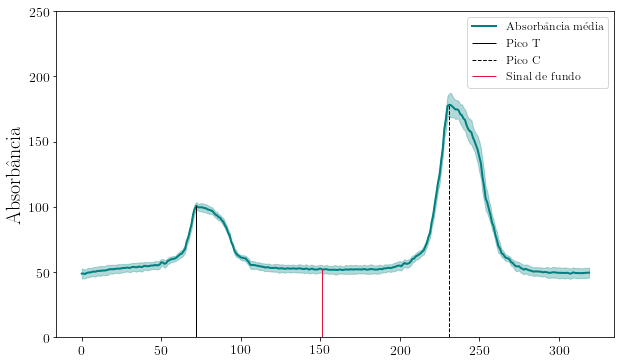

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(np.mean(img_g_lines, axis = 1), lw = 2,
         color = 'teal', label = 'Absorbância média')
plt.fill_between([i for i in range(img_g_lines.shape[0])],
                 np.mean(img_g_lines, axis = 1)-np.std(img_g_lines, axis = 1),
                 np.mean(img_g_lines, axis = 1)+np.std(img_g_lines, axis = 1),
                 alpha = 0.3, color = 'teal')
plt.vlines(pico_T_loc, 0, pico_T, lw = 1, color = 'black', label = 'Pico T')
plt.vlines(pico_C_loc, 0, pico_C, lw = 1, color = 'black', ls = '--', label = 'Pico C')
plt.vlines(fundo_loc, 0, fundo, lw = 1, color = 'crimson', label = 'Sinal de fundo')
plt.ylabel('Absorbância', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 250)
plt.legend(loc = 'best', fontsize = 12)
fig.patch.set_alpha(1)

Finalmente podemos calcular o valor das intensidades das linhas T, C e o sinal de fundo!

In [ ]:
# Sinal de fundo
bg = np.mean(img_g_lines[fundo_loc-1:fundo_loc+1,:])
bg_std = np.std(img_g_lines[fundo_loc-1:fundo_loc+1,:])

# Linha teste
T = np.mean(img_g_lines[pico_T_loc-1:pico_T_loc+1,:])
T_std = np.std(img_g_lines[pico_T_loc-1:pico_T_loc+1,:])

# Linha controle
ctrl = np.mean(img_g_lines[pico_C_loc-1:pico_C_loc+1,:])
ctrl_std = np.std(img_g_lines[pico_C_loc-1:pico_C_loc+1,:])

print(f'Sinal de fundo: {bg:2f} +/- {bg_std:2f}')
print(f'Sinal teste: {T:.2f} +/- {T_std:.2f}')
print(f'Sinal controle: {ctrl:.2f} +/- {ctrl_std:.2f}')

Sinal de fundo: 52.471429 +/- 3.045941
Sinal teste: 99.76 +/- 3.42
Sinal controle: 177.81 +/- 8.32


E por fim, calculamos a razão teste-controle normalizada pela subtração do sinal de fundo

\begin{align}
    R_{\mathrm{T}/\mathrm{C}} = \frac{h_{\mathrm{t}} - h_{\mathrm{bg}}}{h_{\mathrm{c}} - h_{\mathrm{bg}}}
\end{align}

In [ ]:
new_T = T - bg
new_T_std = np.sqrt(T_std**2 + bg_std**2)
new_ctrl = ctrl - bg
new_ctrl_std = np.sqrt(ctrl_std**2 + bg_std**2)

result = new_T/new_ctrl
result_std = result*((new_T_std/new_T) + (new_ctrl_std/new_ctrl))

print(f'Resultado: {result:.4f} +/- {result_std:.4f}')

Resultado: 0.3773 +/- 0.0632


Por último, podemos fazer um gráfico da razão teste-controle com o passar dos dias. Para isso, precisamos ter anotado os valores de resultados e seus erros. Contruiremos uma lista em Python com eles para fazer o gráfico. Há 3 listas que devem ser preenchidas, a lista "days" com os dias dos testes, relativo ao dia de início dos sintomas, a lista "results" com os resultados da razão teste-controle e a lista "results_err" com os valores de erro.

Por exemplo, se você fez 3 testes, no 1º dia após o início dos sintomas, no 4º e no 6º dias, e obteve os valores $R_1 = 3$, $R_4 = 1.4$ e $R_6 = 0.7$, com margens de erro $\sigma_1 = 0.2$, $\sigma_4 = 0.09$ e $\sigma_6 = 0.03$, as listas devem ser preenchidas na forma

```python
days = [1,4,6]
results = [3,1.4,0.7]
results_err = [0.2,0.09,0.03]
```

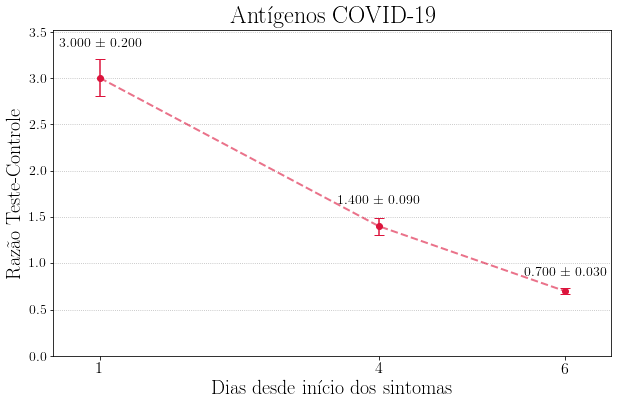

In [ ]:
# Preencha as listas com os valores das razões e os dias dos testes, separando os valores diferentes
# com virgulas
days = []
results = []
results_err = []

# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha = 0.6, ls = 'dotted')
plt.plot(days, results, color = 'crimson', ls = '--',
        lw = 2, alpha = 0.6)
plt.scatter(days, results, color = 'crimson')
plt.errorbar(days, results, yerr = results_err,
            fmt = 'none', capsize = 5, color = 'crimson')
for i in range(len(days)):
    plt.text(days[i], results[i]+results_err[i]+0.15, f'{results[i]:.3f} $\pm$ {results_err[i]:.3f}',
             fontsize = 14, ha = 'center')
plt.xlabel('Dias desde início dos sintomas', fontsize = 20)
plt.ylabel('Razão Teste-Controle', fontsize = 20)
plt.title('Antígenos COVID-19', fontsize = 24)
plt.xticks(days, fontsize = 16)
plt.yticks(fontsize = 14)
plt.ylim(0, 1.1*(np.max(results)+np.max(results_err)))
plt.xlim(days[0]-0.5,days[-1]+0.5)
fig.patch.set_alpha(1)
plt.show()

Com isso, podemos agora ter uma ideia da dinâmica temporal da carga viral em quem faz o teste. Qualquer dúvida, sinta-se livre para me contatar pelo Twitter ([@pedrocintra52](https://twitter.com/pedrocintra52)) ou por email (pedrohpc96@hotmail.com), mas honestamente a chance de que eu te responda mais rápido é pelo Twitter.

Cuidem-se e busquem atendimento médico caso possuam um RTA positivo :)

![pikachu_funkeiro.png](https://drive.google.com/uc?export=view&id=1vCa0_GbuEG9e9mf80j5p76dpDYKJRXSK)